Information for the data : https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction <br>
Data's link : https://www.kaggle.com/competitions/playground-series-s3e6/data

# DATA IMPORTING

## Library Import

In [1]:
!pip install pydot
!pip install pydotplus
!pip install eli5
!pip install optuna
!pip install umap-learn
!pip install autofeat
!pip install ydata-profiling
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 8.1 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=3e0385a0bcf8f8ea34022a2255dc3d51e01597e18bc9311c804976653bddd577
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 11)
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('darkgrid')
import ydata_profiling
from ydata_profiling import ProfileReport
import os
os.environ['WANDB_NOTEBOOK_NAME'] = 'Kaggle_PS3E6-Regression_Baseline.ipynb'
os.environ['WANDB_API_KEY'] = 'ce65c479b8e902dde4b667d5a036920e668c3602'

from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
import optuna
from autofeat import FeatureSelector, AutoFeatRegressor
import wandb
from wandb.sklearn import plot_regressor
wandb.login()

from umap import UMAP
import gc
import pydot, pydotplus
from datetime import datetime, date

import eli5
from eli5.sklearn import PermutationImportance
from warnings import filterwarnings, simplefilter
filterwarnings('ignore')
simplefilter('ignore')

today = date.today()

wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find Kaggle_PS3E6-Regression_Baseline.ipynb.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_df = pd.read_csv("/content/drive/MyDrive/ML Project /Kaggle's Playground Series S3E6/Data/train.csv")
display(train_df)

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4
22728,22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0,6584708.2


In [5]:
test_df = pd.read_csv("/content/drive/MyDrive/ML Project /Kaggle's Playground Series S3E6/Data/test.csv")
display(test_df)

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,22730,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
1,22731,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
2,22732,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2
3,22733,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5
4,22734,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15149,37879,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1
15150,37880,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0
15151,37881,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10
15152,37882,77604,51,0,1,33,67056,4,3,2019,0,0,9578,9706,135,0,2


In [6]:
sub = pd.read_csv("/content/drive/MyDrive/ML Project /Kaggle's Playground Series S3E6/Data/sample_submission.csv")
sub

,id,price
0,22730,4634456.897
1,22731,4634456.897
2,22732,4634456.897
3,22733,4634456.897
4,22734,4634456.897
...,...,...
15149,37879,4634456.897
15150,37880,4634456.897
15151,37881,4634456.897
15152,37882,4634456.897


In [7]:
y = train_df.pop('price')
print(y)

0        3436795.2
1        9519958.0
2        9276448.1
3        9725732.2
4        6181908.8
           ...    
22725    5594137.1
22726    6594705.0
22727    9321511.4
22728    6584708.2
22729    8231424.8
Name: price, Length: 22730, dtype: float64


In [8]:
id_train = train_df.pop('id')
id_test = test_df.pop('id')

## Information of the Data

### Checking NaN Values

In [9]:
train_df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
dtype: int64

In [10]:
test_df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
dtype: int64

No NaN Values.

### Checking Data Types

In [11]:
train_df.dtypes

squareMeters         int64
numberOfRooms        int64
hasYard              int64
hasPool              int64
floors               int64
cityCode             int64
cityPartRange        int64
numPrevOwners        int64
made                 int64
isNewBuilt           int64
hasStormProtector    int64
basement             int64
attic                int64
garage               int64
hasStorageRoom       int64
hasGuestRoom         int64
dtype: object

In [12]:
test_df.dtypes

squareMeters         int64
numberOfRooms        int64
hasYard              int64
hasPool              int64
floors               int64
cityCode             int64
cityPartRange        int64
numPrevOwners        int64
made                 int64
isNewBuilt           int64
hasStormProtector    int64
basement             int64
attic                int64
garage               int64
hasStorageRoom       int64
hasGuestRoom         int64
dtype: object

### Checking Unique Value

In [13]:
train_df.nunique().sort_values()

hasYard                 2
hasPool                 2
isNewBuilt              2
hasStormProtector       2
hasStorageRoom          2
cityPartRange          10
numPrevOwners          10
hasGuestRoom           11
made                   33
numberOfRooms         100
floors                101
garage                896
basement             4903
attic                5167
squareMeters         7319
cityCode             7810
dtype: int64

In [14]:
test_df.nunique().sort_values()

hasYard                 2
hasPool                 2
isNewBuilt              2
hasStormProtector       2
hasStorageRoom          2
cityPartRange          10
numPrevOwners          10
hasGuestRoom           11
made                   32
numberOfRooms         100
floors                100
garage                881
basement             4216
attic                4558
squareMeters         6433
cityCode             6632
dtype: int64

I thought that every integer will be numerical. But turns out there are categorical as well.

In [15]:
# Mark them with categorical and numerical
cat = [col for col in train_df if train_df[col].nunique() < 10]
num = [col for col in train_df if train_df[col].nunique() >= 10]
print(f'Categorical : {cat}\nNumerical : {num}')

Categorical : ['hasYard', 'hasPool', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom']
Numerical : ['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'basement', 'attic', 'garage', 'hasGuestRoom']


## Exploratory Data Analysis

### Data Statistic

In [16]:
train_df.describe().drop('count')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
mean,4.658622e+04,48.241091,0.475891,0.452750,47.305983,50013.795996,5.585042,5.620766,2008.005059,0.467972,0.460009,5283.646634,5067.981698,530.469644,0.461681,5.153058
std,4.952124e+04,28.226428,0.499429,0.497773,47.777207,30006.637729,2.739533,2.713026,118.826777,0.498984,0.498409,3047.084412,3097.347939,274.840604,0.498540,3.055246
min,8.900000e+01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000
25%,2.039275e+04,25.000000,0.000000,0.000000,25.000000,22936.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,2977.250000,2599.000000,297.000000,0.000000,3.000000
50%,4.448400e+04,47.000000,0.000000,0.000000,45.000000,50414.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,4977.000000,515.000000,0.000000,5.000000
75%,7.154700e+04,75.000000,1.000000,1.000000,69.000000,76291.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7746.000000,7652.000000,767.000000,1.000000,8.000000
max,6.071330e+06,100.000000,1.000000,1.000000,6000.000000,491100.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000


In [17]:
test_df.describe().drop('count')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
mean,45729.407681,47.874951,0.483371,0.445361,46.401148,50185.582750,5.616933,5.602547,2006.225485,0.472219,0.463442,5299.415468,5057.506599,525.091065,0.463178,5.095618
std,29200.142520,28.164077,0.499740,0.497022,27.000547,31227.690126,2.727914,2.718316,8.156347,0.499244,0.498678,2980.156234,2928.004147,268.504745,0.498659,3.049174
min,69.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,8.000000,1.000000,8.000000,0.000000,0.000000
25%,19189.000000,25.000000,0.000000,0.000000,25.000000,23141.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,3114.000000,2567.000000,294.250000,0.000000,2.000000
50%,43802.000000,46.000000,0.000000,0.000000,44.000000,50693.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,5017.000000,501.000000,0.000000,5.000000
75%,70898.000000,75.000000,1.000000,1.000000,69.000000,76264.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7739.000000,7650.750000,757.000000,1.000000,8.000000
max,99999.000000,100.000000,1.000000,1.000000,100.000000,977950.000000,10.000000,10.000000,2021.000000,1.000000,1.000000,89016.000000,38535.000000,1000.000000,1.000000,10.000000


Kurt, Max, Mean, Median, Min, Skew, STD, Var

In [18]:
def data_stats(df) : # This function is used to find out Kurtosis, Max, Mean, Median, Min, Skew, and Standard Deviation of each columns in a dataset.
    res = pd.DataFrame()
    info = ['Kurt', 'Max', 'Mean', 'Median', 'Min', 'Skew', 'Std']
    for col in df.columns :
        res.loc['Kurt', col] = df[col].kurt()
        res.loc['Max', col] = df[col].max()
        res.loc['Mean', col] = df[col].mean()
        res.loc['Median', col] = df[col].median()
        res.loc['Min', col] = df[col].min()
        res.loc['Skew', col] = df[col].skew()
        res.loc['Std', col] = df[col].std()
    return res

In [19]:
data_stats(train_df)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
Kurt,9.638226e+03,-1.142008,-1.990852,-1.964125,10602.073056,2.441805,-1.150056,-1.108830,4499.646148,-1.983692,-1.974417,93.568049,68.698849,38.674698,-1.976538,-1.143272
Max,6.071330e+06,100.000000,1.000000,1.000000,6000.000000,491100.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000
Mean,4.658622e+04,48.241091,0.475891,0.452750,47.305983,50013.795996,5.585042,5.620766,2008.005059,0.467972,0.460009,5283.646634,5067.981698,530.469644,0.461681,5.153058
Median,4.448400e+04,47.000000,0.000000,0.000000,45.000000,50414.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,4977.000000,515.000000,0.000000,5.000000
Min,8.900000e+01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000
Skew,7.925331e+01,0.115080,0.096555,0.189863,85.122328,0.245796,-0.093056,-0.077110,66.934411,0.128385,0.160490,3.336637,2.809963,1.378759,0.153740,-0.117772
Std,4.952124e+04,28.226428,0.499429,0.497773,47.777207,30006.637729,2.739533,2.713026,118.826777,0.498984,0.498409,3047.084412,3097.347939,274.840604,0.498540,3.055246


In [20]:
data_stats(test_df)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
Kurt,-1.197507,-1.138334,-1.995833,-1.951904,-1.015818,84.546929,-1.125742,-1.107992,-1.194388,-1.987873,-1.978758,72.430282,0.232373,-1.201376,-1.978445,-1.152771
Max,99999.000000,100.000000,1.000000,1.000000,100.000000,977950.000000,10.000000,10.000000,2021.000000,1.000000,1.000000,89016.000000,38535.000000,1000.000000,1.000000,10.000000
Mean,45729.407681,47.874951,0.483371,0.445361,46.401148,50185.582750,5.616933,5.602547,2006.225485,0.472219,0.463442,5299.415468,5057.506599,525.091065,0.463178,5.095618
Median,43802.000000,46.000000,0.000000,0.000000,44.000000,50693.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,5017.000000,501.000000,0.000000,5.000000
Min,69.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,8.000000,1.000000,8.000000,0.000000,0.000000
Skew,0.146875,0.126288,0.066560,0.219895,0.164627,3.014568,-0.101422,-0.079317,0.135960,0.111309,0.146639,2.553953,0.052473,0.124967,0.147703,-0.108668
Std,29200.142520,28.164077,0.499740,0.497022,27.000547,31227.690126,2.727914,2.718316,8.156347,0.499244,0.498678,2980.156234,2928.004147,268.504745,0.498659,3.049174


Reference for Kurtosis : https://www.researchgate.net/figure/Illustration-of-the-skewness-and-kurtosis-values-and-how-they-correlate-with-the-shape-of_fig1_298415862

Reference for Skewness : https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html#:~:text=A%20skewness%20value%20greater%20than,the%20distribution%20is%20fairly%20symmetrical.

Reference for Standard Deviation : https://en.wikipedia.org/wiki/Standard_deviation

### Distribution Check

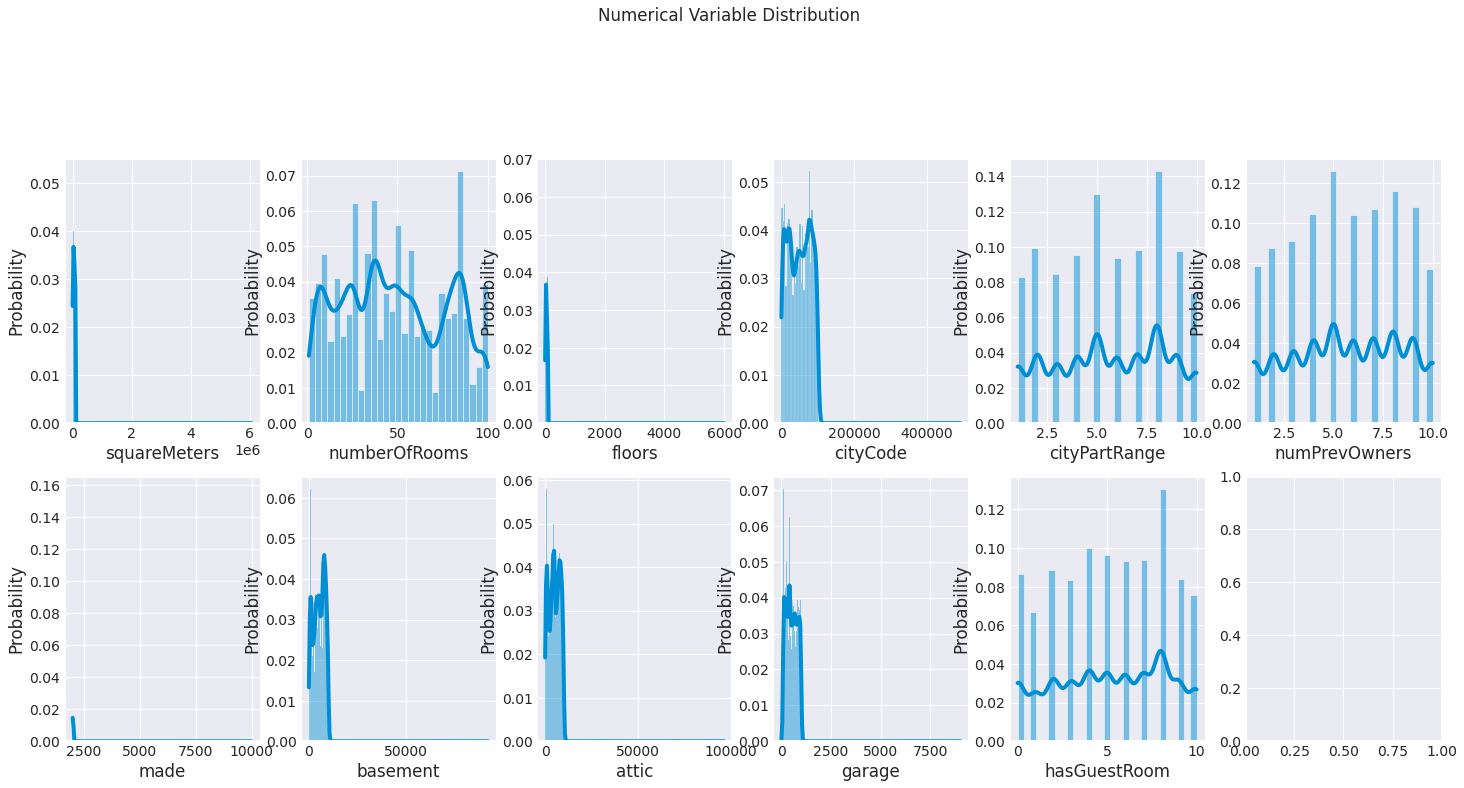

In [21]:
f, axes = plt.subplots(2, 6, figsize = (22, 10))
for col, ax in zip(num, axes.ravel()) :
    _ = sns.histplot(train_df[col], ax = ax, stat = 'probability', kde = True)
    ax.set_xlabel(col)
plt.suptitle('Numerical Variable Distribution', y = 1.09)
plt.show()

Lot of outliers.

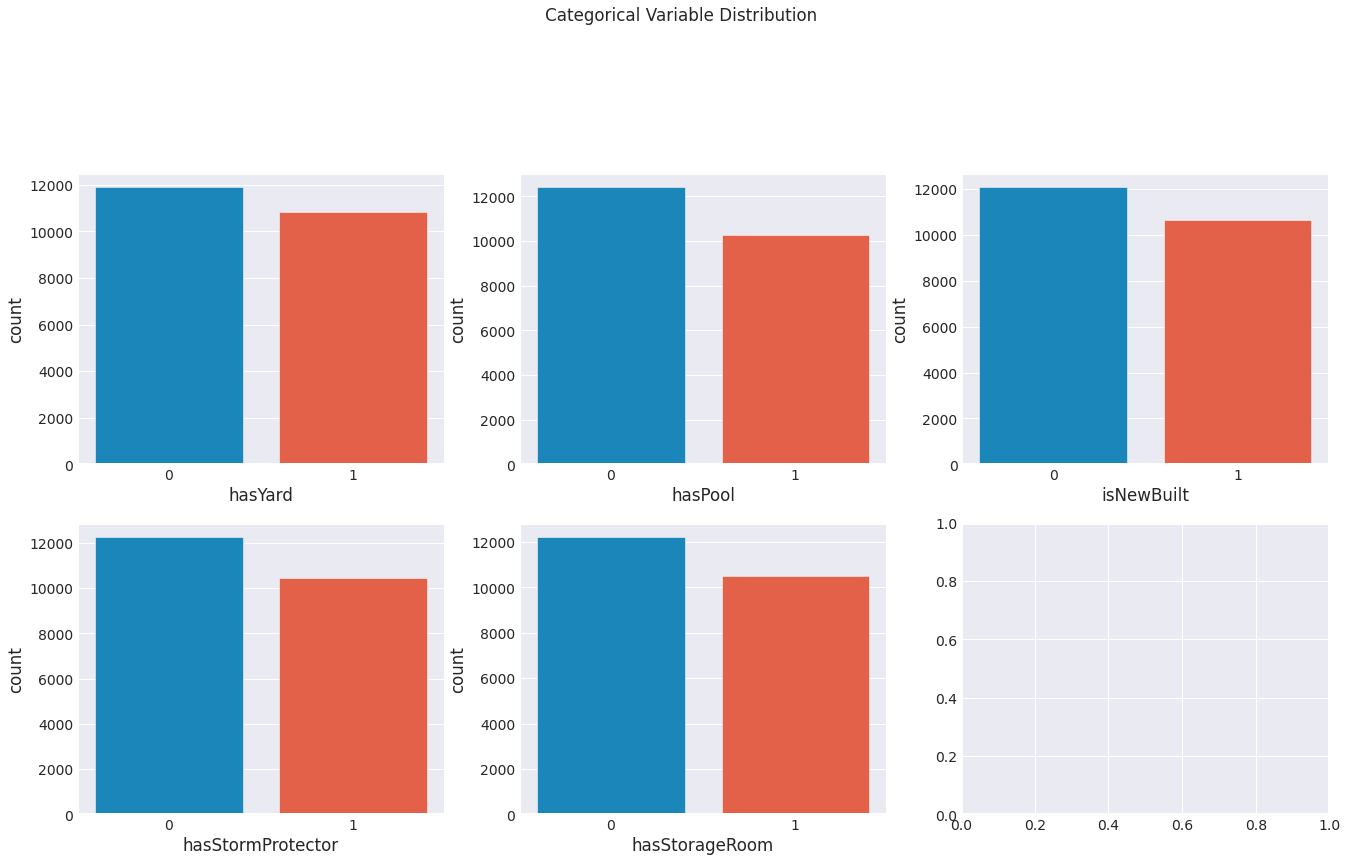

In [22]:
f, axes = plt.subplots(2, 3, figsize = (20, 11))
for col, ax in zip(cat, axes.ravel()) :
    _ = sns.countplot(train_df[col], ax = ax)
    ax.set_xlabel(col)
plt.suptitle('Categorical Variable Distribution', y = 1.09)
plt.show()

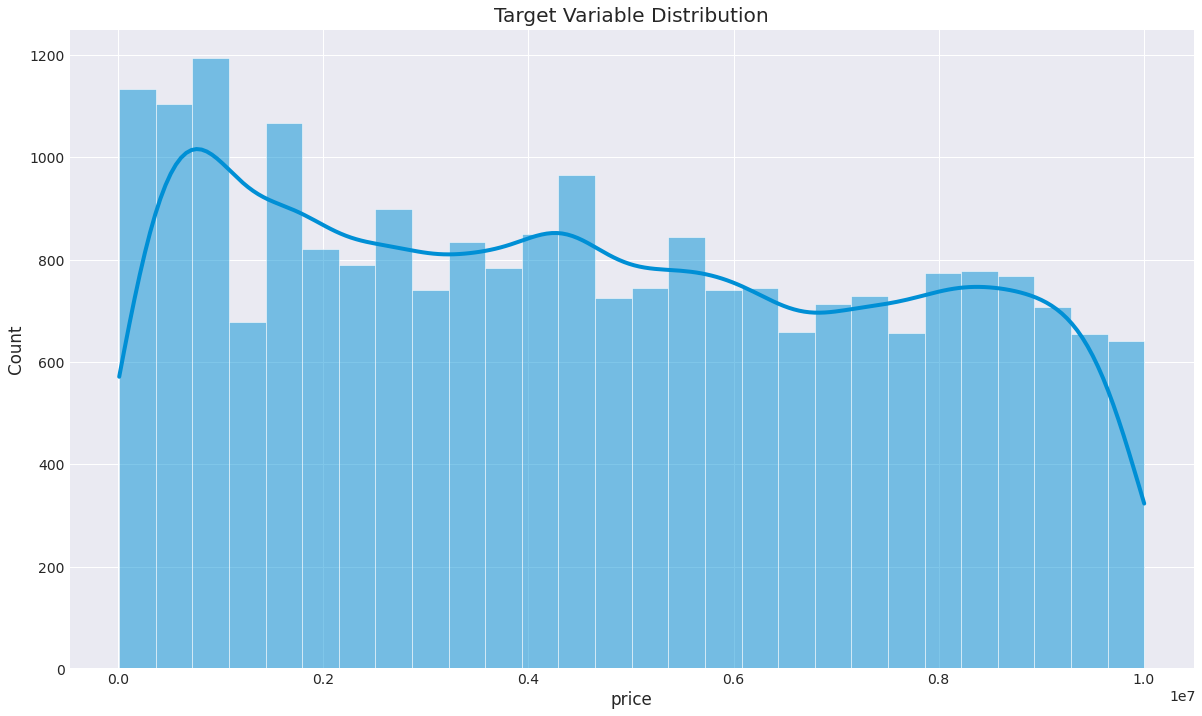

In [23]:
plt.title('Target Variable Distribution')
sns.histplot(y, kde = True)
plt.show()

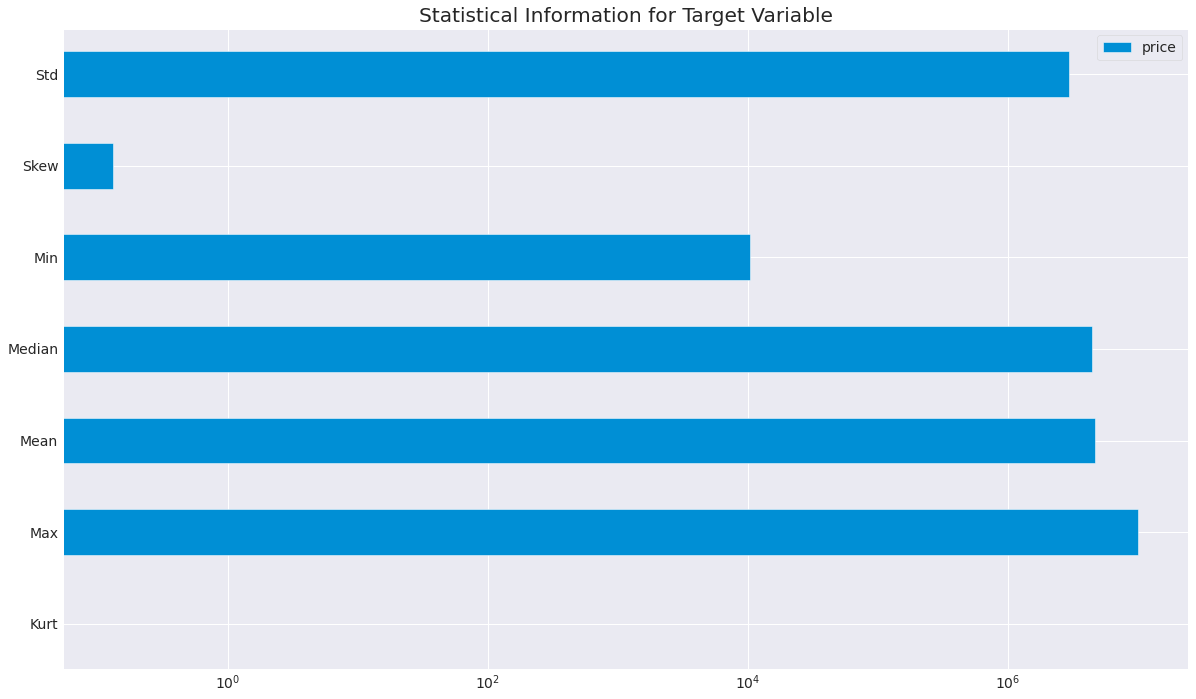

In [24]:
data_stats(y.to_frame()).plot.barh(logx = True)
plt.title('Statistical Information for Target Variable')
plt.show()

Let's do some transformation with the target variable later.

### Outlier Removal
Reference : https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8

Before we do any of outlier removal, let's see which outlier is human error and which is natural error

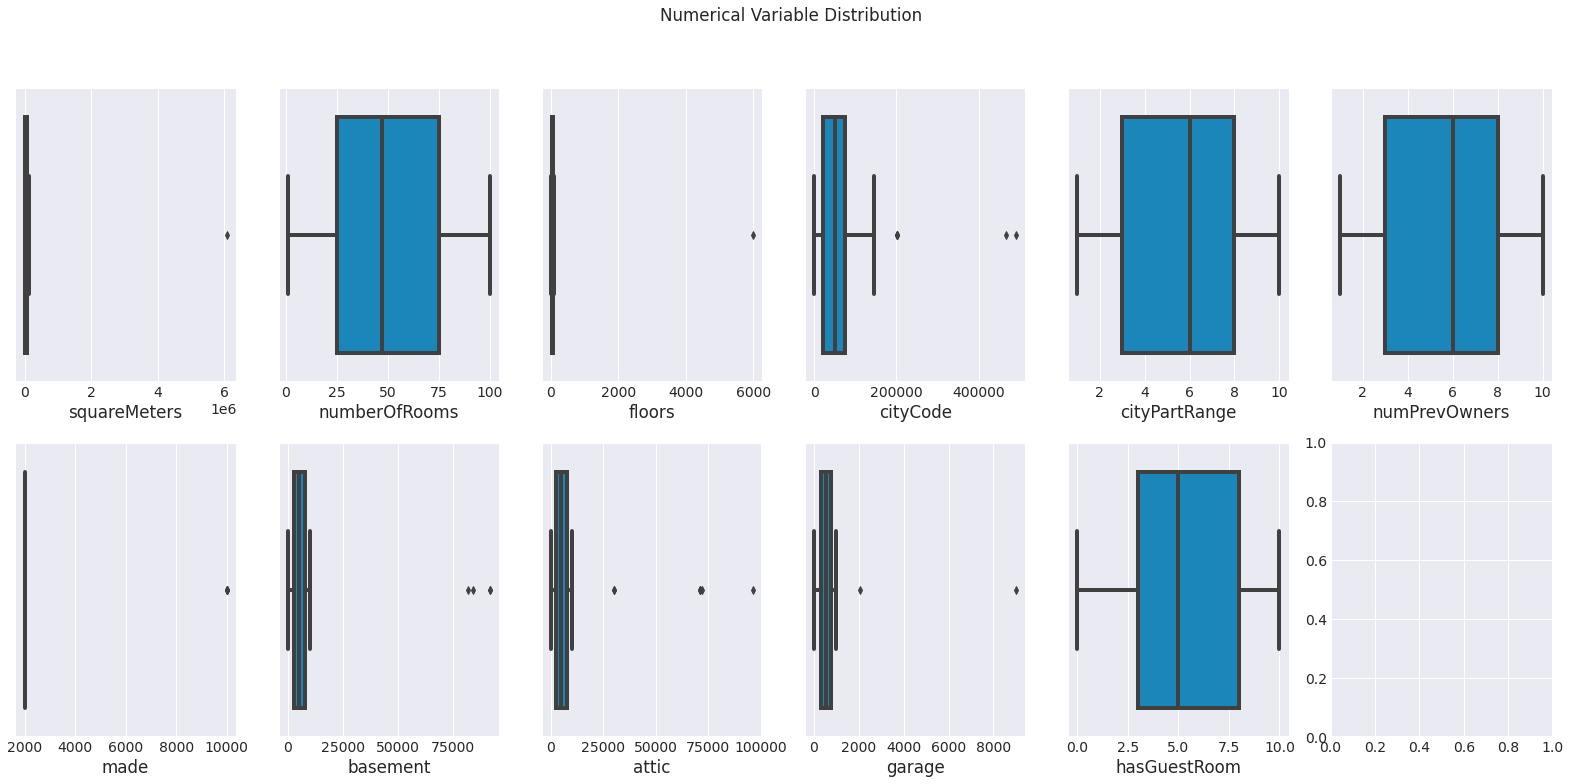

In [25]:
f, axes = plt.subplots(2, 6, figsize = (22, 10))
for col, ax in zip(num, axes.ravel()) :
    _ = sns.boxplot(train_df[col], ax = ax)
    ax.set_xlabel(col)
f.tight_layout()
plt.suptitle('Numerical Variable Distribution', y = 1.09)
plt.show()

In [26]:
outlier = ['squareMeters', 'floors', 'made', 'basement', 'attic', 'garage'] # We won't include the cityCode because it's a zip code and it has nothing to do with outlier

Log the distribution

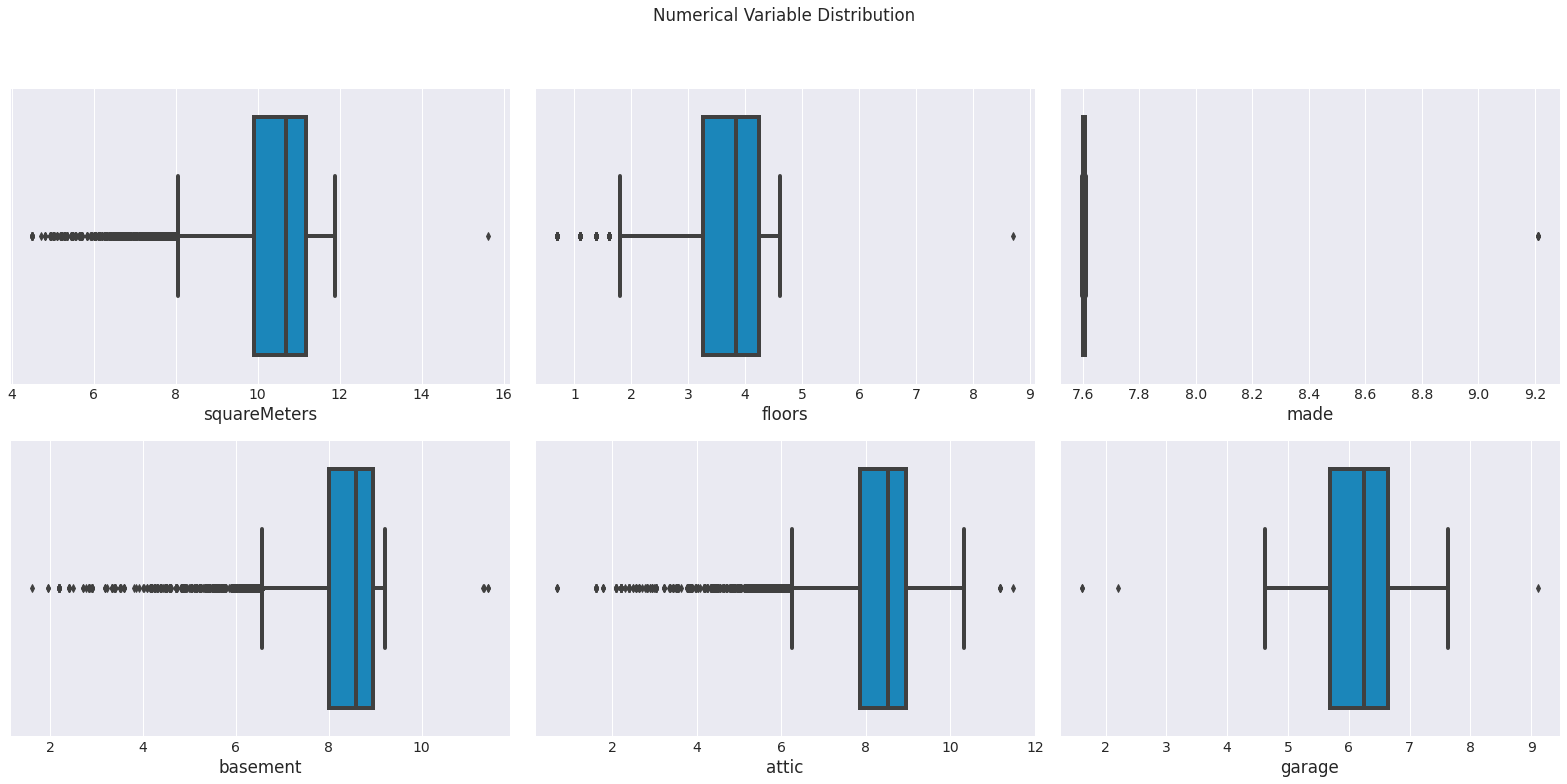

In [27]:
f, axes = plt.subplots(2, 3, figsize = (22, 10))
for col, ax in zip(outlier, axes.ravel()) :
    _ = sns.boxplot(np.log1p(train_df[col]), ax = ax)
    ax.set_xlabel(col)
f.tight_layout()
plt.suptitle('Numerical Variable Distribution', y = 1.09)
plt.show()

It's really impossible to have a 5000+ floors, and made in 10000 years so we will delete those rows extreme values because they are human error outliers (we don't know their true value).

In [28]:
def human_error_remove(df) :
    outlier = df.loc[(df.squareMeters > 4000000) | (df.floors > 2000) | (df.made > 2050) | (df.basement > 25000) | (df.attic > 25000) | (df.garage > 2000)].index
    df.drop(outlier, axis = 0, inplace = True)

In [29]:
train_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0
22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7
22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0
22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0


In [30]:
human_error_remove(train_df)

In [31]:
train_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0
22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7
22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0
22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0


In [32]:
y = y[train_df.index]
y

0        3436795.2
1        9519958.0
2        9276448.1
3        9725732.2
4        6181908.8
           ...    
22725    5594137.1
22726    6594705.0
22727    9321511.4
22728    6584708.2
22729    8231424.8
Name: price, Length: 22710, dtype: float64

In [33]:
train_df = train_df.reset_index(drop = True)
y = y.reset_index(drop = True)

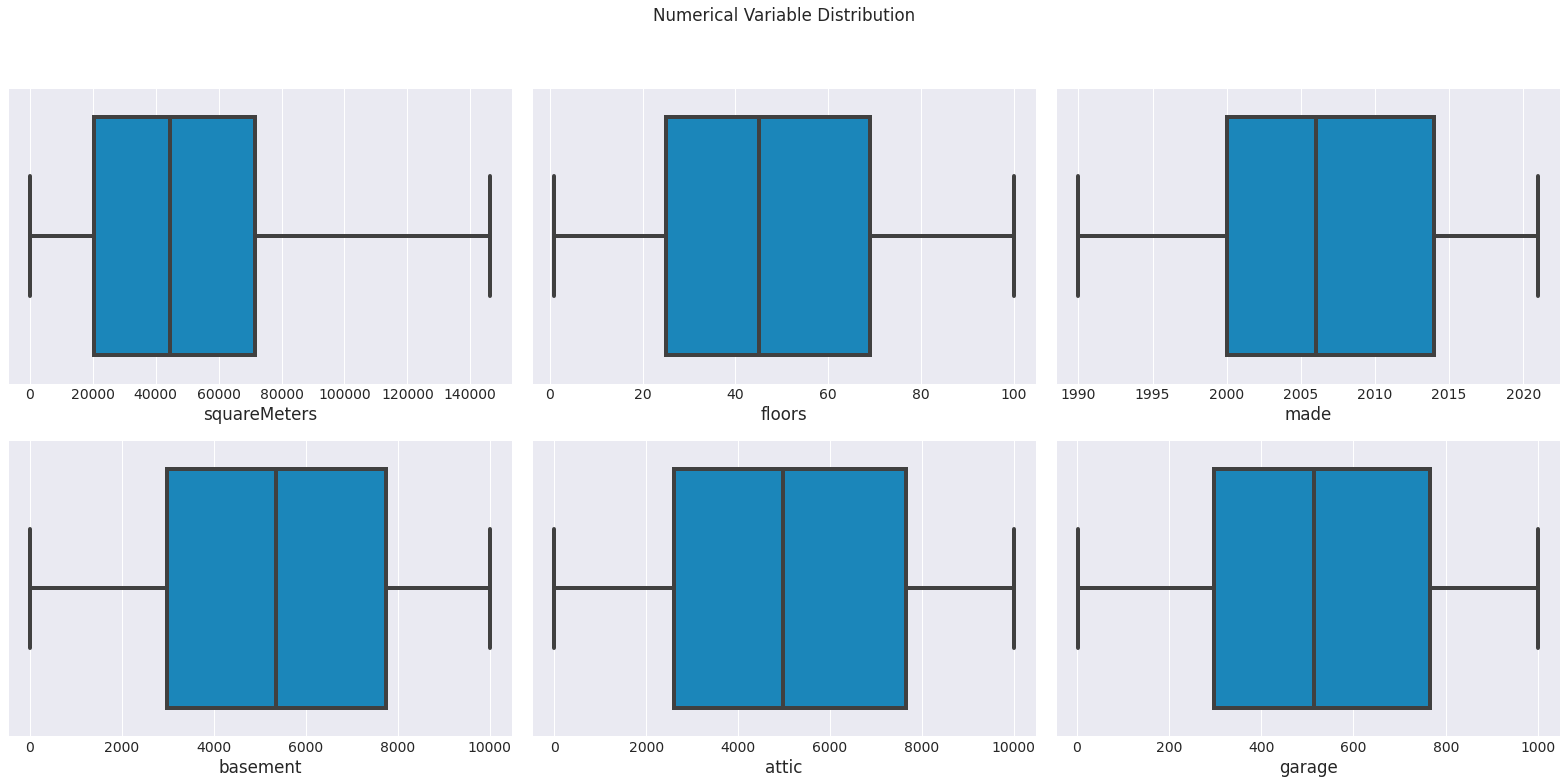

In [34]:
f, axes = plt.subplots(2, 3, figsize = (22, 10))
for col, ax in zip(outlier, axes.ravel()) :
    _ = sns.boxplot(train_df[col], ax = ax)
    ax.set_xlabel(col)
f.tight_layout()
plt.suptitle('Numerical Variable Distribution', y = 1.09)
plt.show()

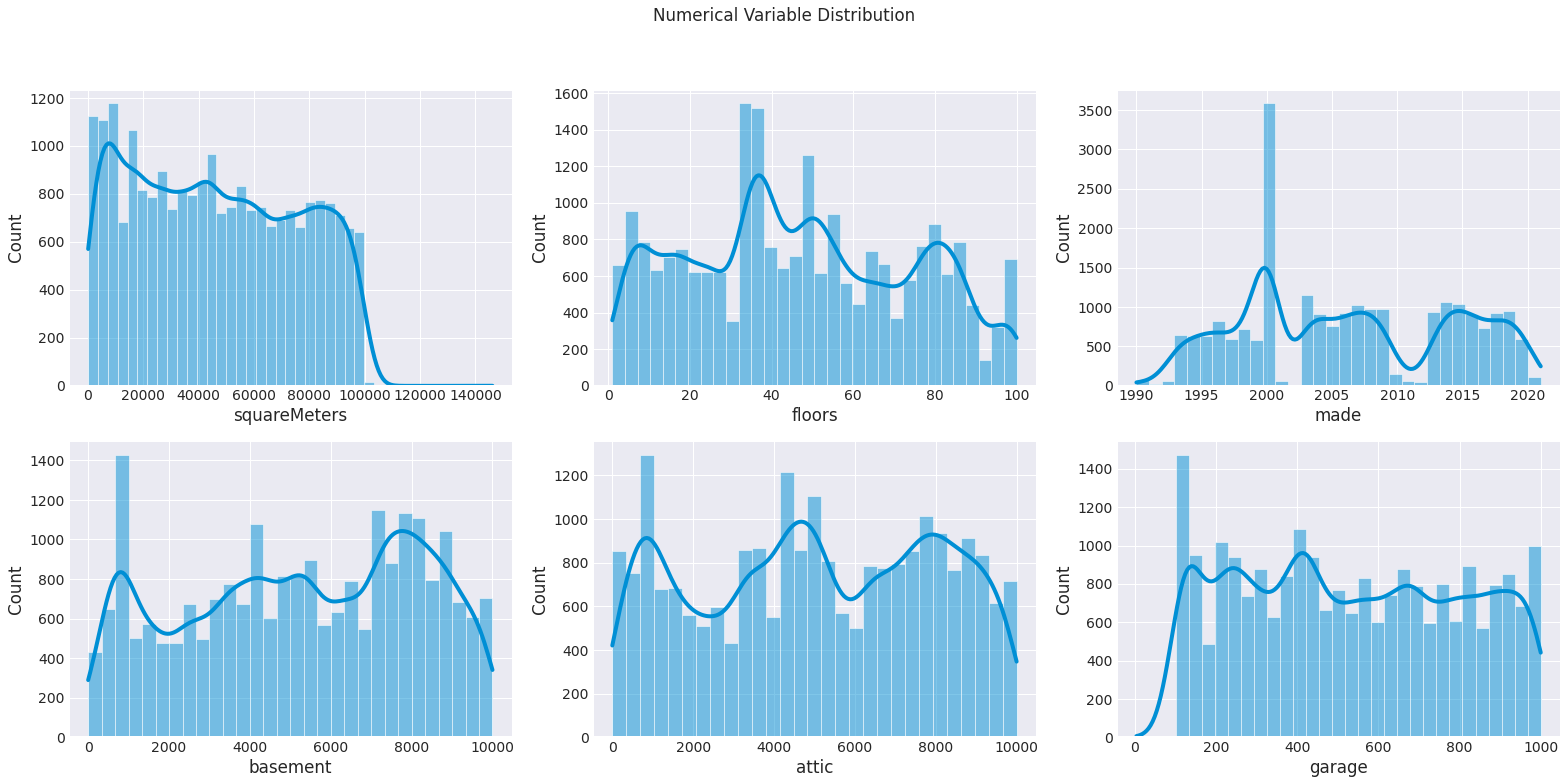

In [35]:
f, axes = plt.subplots(2, 3, figsize = (22, 10))
for col, ax in zip(outlier, axes.ravel()) :
    _ = sns.histplot(train_df[col], ax = ax, kde = True)
    ax.set_xlabel(col)
f.tight_layout()
plt.suptitle('Numerical Variable Distribution', y = 1.09)
plt.show()

Distributions are not skewed.

In [36]:
display(data_stats(train_df))

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
Kurt,-1.199590,-1.142332,-1.991040,-1.964264,-1.014514,2.443709,-1.150184,-1.109109,-1.205352,-1.983754,-1.974257,-1.167037,-1.191840,-1.221625,-1.976714,-1.143226
Max,146181.000000,100.000000,1.000000,1.000000,100.000000,491100.000000,10.000000,10.000000,2021.000000,1.000000,1.000000,10000.000000,10000.000000,1000.000000,1.000000,10.000000
Mean,46314.373184,48.231968,0.476134,0.452840,47.036724,50010.931088,5.584280,5.620652,2006.244254,0.468032,0.459886,5269.225980,5050.089212,530.034610,0.461823,5.154778
Median,44484.000000,47.000000,0.000000,0.000000,45.000000,50411.500000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,4975.500000,515.000000,0.000000,5.000000
Min,89.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000
Skew,0.132532,0.115309,0.095580,0.189497,0.147074,0.246256,-0.092821,-0.077003,0.131906,0.128144,0.160987,-0.177746,-0.079463,0.085989,0.153165,-0.118691
Std,29248.098160,28.228629,0.499441,0.497782,26.898008,30009.321301,2.739567,2.713489,8.121252,0.498988,0.498399,2844.408154,2898.466517,268.838250,0.498551,3.055485


In [37]:
display(data_stats(test_df))

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
Kurt,-1.197507,-1.138334,-1.995833,-1.951904,-1.015818,84.546929,-1.125742,-1.107992,-1.194388,-1.987873,-1.978758,72.430282,0.232373,-1.201376,-1.978445,-1.152771
Max,99999.000000,100.000000,1.000000,1.000000,100.000000,977950.000000,10.000000,10.000000,2021.000000,1.000000,1.000000,89016.000000,38535.000000,1000.000000,1.000000,10.000000
Mean,45729.407681,47.874951,0.483371,0.445361,46.401148,50185.582750,5.616933,5.602547,2006.225485,0.472219,0.463442,5299.415468,5057.506599,525.091065,0.463178,5.095618
Median,43802.000000,46.000000,0.000000,0.000000,44.000000,50693.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,5017.000000,501.000000,0.000000,5.000000
Min,69.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,8.000000,1.000000,8.000000,0.000000,0.000000
Skew,0.146875,0.126288,0.066560,0.219895,0.164627,3.014568,-0.101422,-0.079317,0.135960,0.111309,0.146639,2.553953,0.052473,0.124967,0.147703,-0.108668
Std,29200.142520,28.164077,0.499740,0.497022,27.000547,31227.690126,2.727914,2.718316,8.156347,0.499244,0.498678,2980.156234,2928.004147,268.504745,0.498659,3.049174


### Variable Correlation

In [38]:
train_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22705,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0
22706,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7
22707,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0
22708,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0


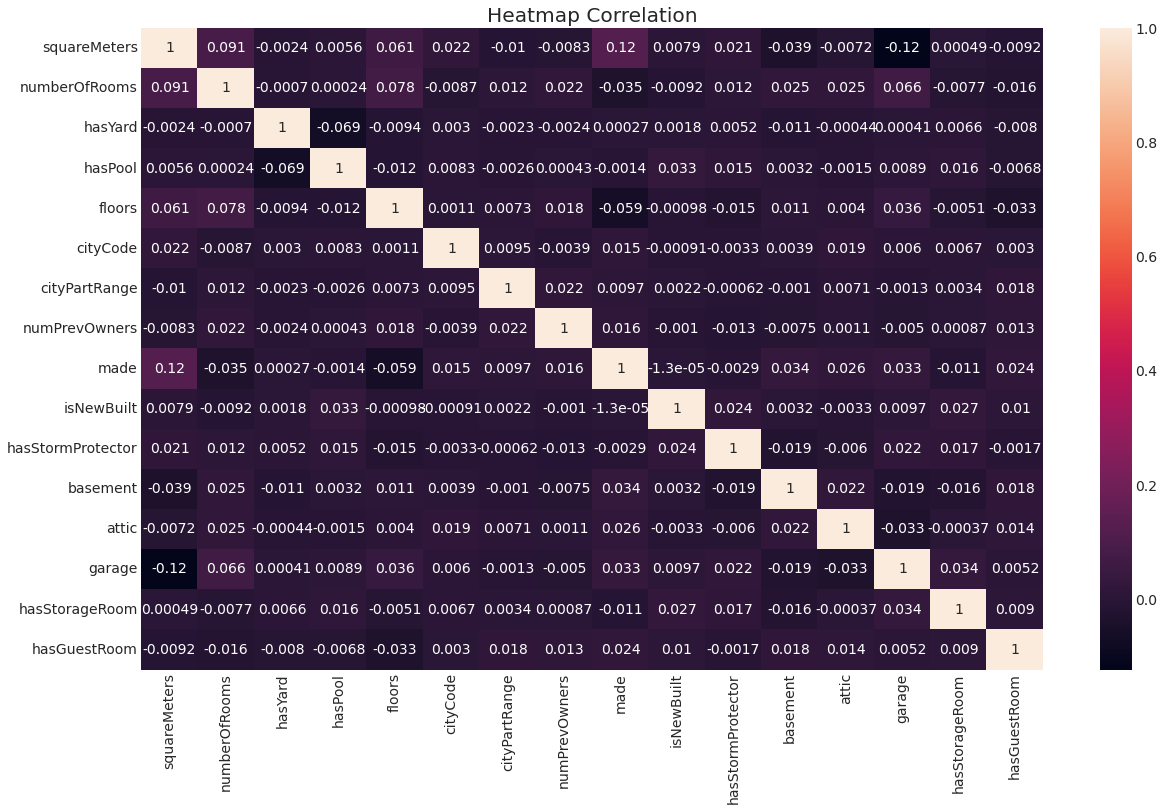

In [39]:
sns.heatmap(train_df.corr(), annot = True)
plt.title('Heatmap Correlation')
plt.show()

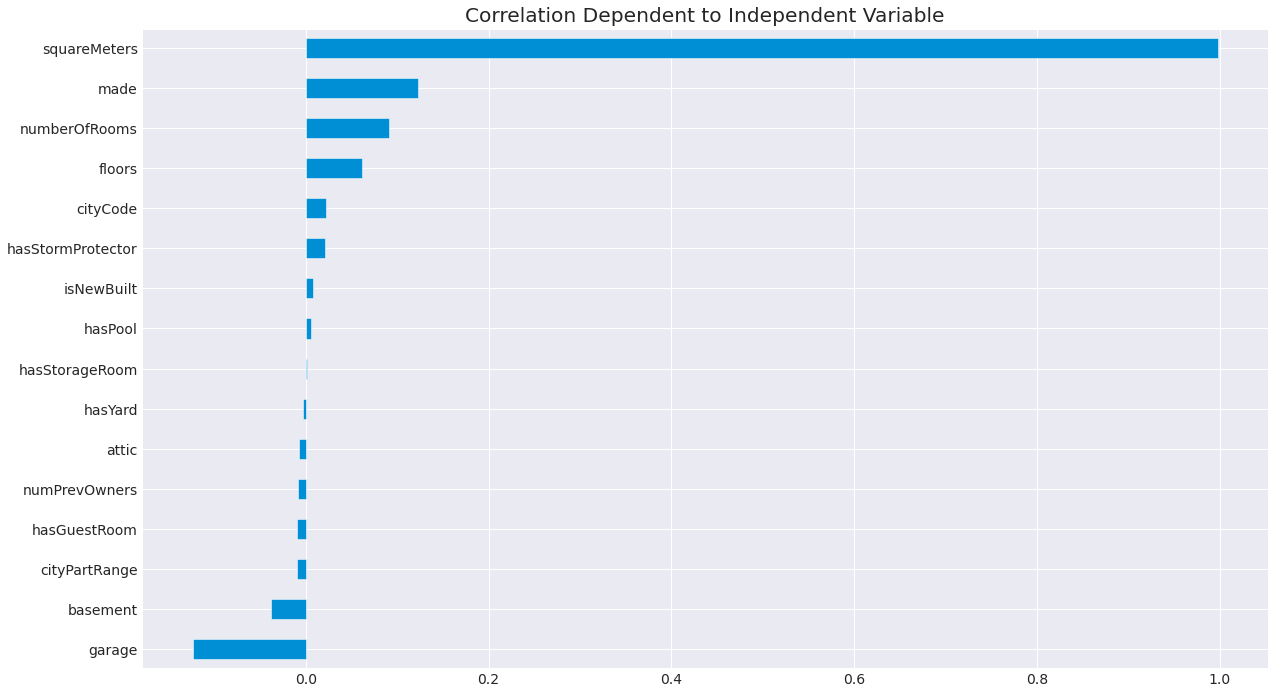

In [40]:
train_df.corrwith(y).sort_values(ascending = True).plot.barh()
plt.title('Correlation Dependent to Independent Variable')
plt.show()

In [41]:
train_df.corrwith(y).sort_values(ascending = True)

garage              -0.123858
basement            -0.038585
cityPartRange       -0.009655
hasGuestRoom        -0.009145
numPrevOwners       -0.008659
attic               -0.007695
hasYard             -0.002564
hasStorageRoom       0.001637
hasPool              0.006093
isNewBuilt           0.008094
hasStormProtector    0.020583
cityCode             0.021804
floors               0.061495
numberOfRooms        0.091573
made                 0.123096
squareMeters         0.997549
dtype: float64

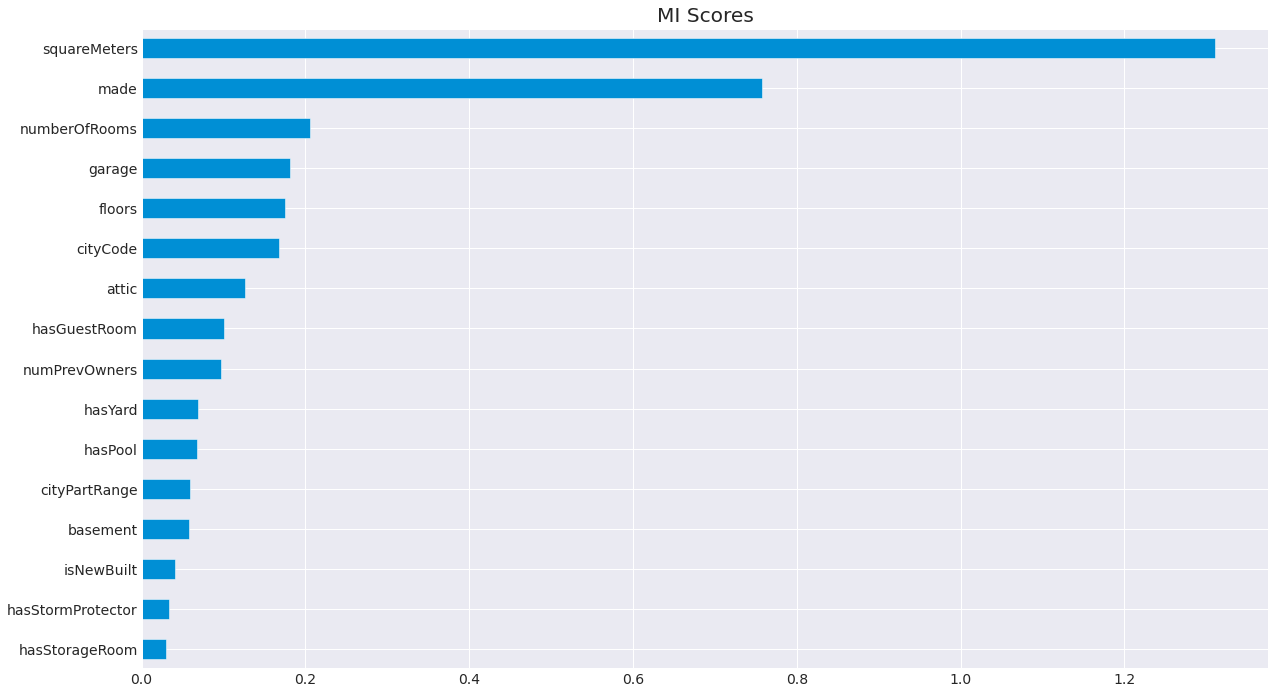

In [42]:
mi_scores = mutual_info_regression(train_df, y, random_state = 0)
mi_scores = pd.Series(
    mi_scores,
    index = train_df.columns,
    name = 'MI Scores'
).sort_values(ascending = True)
mi_scores.plot.barh()
plt.title("MI Scores")
plt.show()

<b>squareMeters</b> has a huge amount of correlation with the target variable, it's even almost one. This variable could be good predictor but it could be also be false positives. (Always be curious) <br><br>
There's also something that caught on my eye, <b>cityCode</b> has a good amount of correlation, which is supposed to be not like this. We'll try using Permutation Importance.

### Permutation Importance

In [43]:
xtrain, xval, ytrain, yval = train_test_split(train_df, y, random_state = 0, test_size = .2)
model = RandomForestRegressor(random_state = 0).fit(xtrain, ytrain)
perm = PermutationImportance(model, random_state = 0, scoring = make_scorer(mean_absolute_error, greater_is_better = False)).fit(xval, yval)
eli5.show_weights(perm, feature_names = xval.columns.tolist())

Weight,Feature
3326274.5335 ± 60333.9542,squareMeters
1143.3742 ± 1788.3330,garage
1097.8191 ± 325.5766,cityCode
631.9364 ± 295.7655,made
364.0993 ± 732.4663,basement
338.7534 ± 302.7327,numberOfRooms
299.1999 ± 216.3465,floors
187.7311 ± 489.8750,numPrevOwners
64.5480 ± 188.0929,attic
33.1786 ± 45.9699,isNewBuilt


### Best Variable Analysis

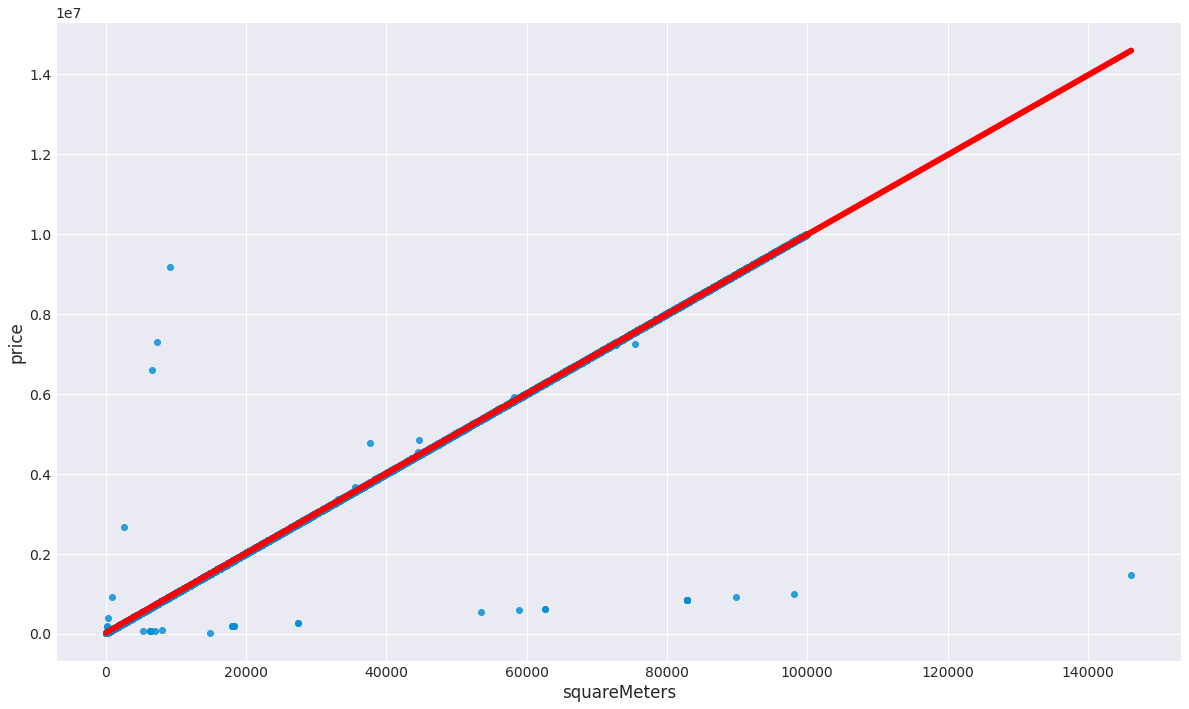

In [44]:
_ = sns.regplot(x = train_df.squareMeters, y = y, seed = 0, line_kws= {'color' : 'red'})

### Pandas Profiling

In [45]:
train_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22705,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0
22706,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7
22707,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0
22708,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0


In [46]:
profile = ProfileReport(train_df, title = 'Housing Paris')
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [47]:
profile.to_file("/content/drive/MyDrive/ML Project /Kaggle's Playground Series S3E6/Data Profile/PS3E6.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# FEATURE ENGINEERING

In [48]:
train_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22705,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0
22706,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7
22707,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0
22708,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0


In [49]:
test_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
1,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
2,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2
3,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5
4,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15149,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1
15150,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0
15151,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10
15152,77604,51,0,1,33,67056,4,3,2019,0,0,9578,9706,135,0,2


## Outlier Check

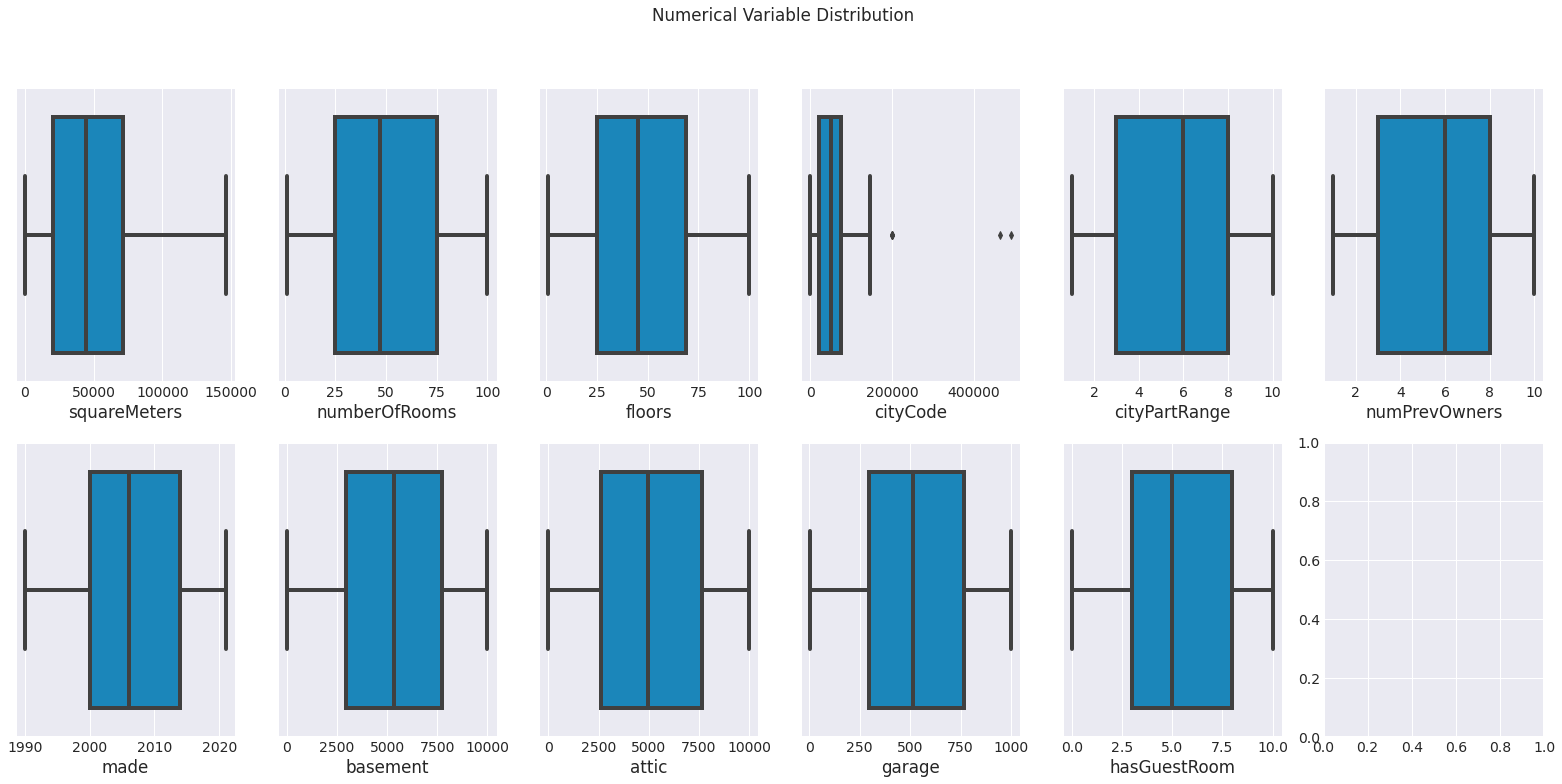

In [50]:
f, axes = plt.subplots(2, 6, figsize = (22, 10))
for col, ax in zip(num, axes.ravel()) :
    _ = sns.boxplot(train_df[col], ax = ax)
    ax.set_xlabel(col)
f.tight_layout()
plt.suptitle('Numerical Variable Distribution', y = 1.09)
plt.show()

In [51]:
train_df.drop('cityCode', axis = 1, inplace = True)
test_df.drop('cityCode', axis = 1, inplace = True)

We drop cityCode because cityCode doesn't seem to be helpful because it's just a zipcode.

# MODELLING

## Try Optuna

Let's try various different models and pick the best
* SVR
* Random Forest
* Decision Tree
* Extra Tree
* Extra Trees
* Linear Regression
* Ridge
* Lasso

In [52]:
kf = KFold(n_splits = 4, random_state = 0, shuffle = True)

In [53]:
def optimize(trial) :
    print('')
    scores = []
    CONFIG = dict(
            model_type = trial.suggest_categorical('model_type', ['SVR', 'RF', 'DT', 'Extra Tree', 'Extra Trees', 'Linear Regression', 'Ridge', 'Lasso', 'ElasticNet']),
            C = trial.suggest_float('C', 0.1, 100),
            kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'sigmoid', 'rbf']),
            degree = trial.suggest_int('degree', 2, 4),
            n_estimators = trial.suggest_int('n_estimators', 50, 500),
            criterion = trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error']),
            min_samples_leaf = trial.suggest_float('min_samples_leaf', .001, .49),
            alpha = trial.suggest_float('alpha', 0, 10),
            solver = trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']),
            l1_ratio = trial.suggest_float('l1_ratio', .1, .9),
    )
    wandb.init(
        project = 'Kaggle-PS3E6',
        entity = 'rizkyk592',
        config = CONFIG,
        group = f'PS3E6-Optimize-{today.strftime("%d/%m/%Y")}',
        reinit = True
    )
    for i, (t, v) in enumerate(kf.split(train_df, y)) :
        xtrain = train_df.iloc[t, :]
        xval = train_df.iloc[v, :]
        ytrain = y.iloc[t]
        yval = y.iloc[v]
        scaler = StandardScaler()

        model_type = CONFIG['model_type']
        if model_type == 'SVR' :
            xtrain[xtrain.columns] = scaler.fit_transform(xtrain)
            xval[xval.columns] = scaler.transform(xval)
            model = SVR(
                C = CONFIG['C'],
                kernel = CONFIG['kernel'],
                degree = CONFIG['degree']
            )
        if model_type == 'RF' :
            model = RandomForestRegressor(
                n_estimators = CONFIG['n_estimators'],
                criterion = CONFIG['criterion'],
                min_samples_leaf = CONFIG['min_samples_leaf'],
                random_state = 0,
                n_jobs = -1
            )
        if model_type == 'DT' :
            model = DecisionTreeRegressor(
                criterion = CONFIG['criterion'],
                min_samples_leaf = CONFIG['min_samples_leaf'],
                random_state = 0
            )
        if model_type == 'Extra Tree' :
            model = ExtraTreeRegressor(
                criterion = CONFIG['criterion'],
                min_samples_leaf = CONFIG['min_samples_leaf'],
                random_state = 0
            )
        if model_type == 'Extra Trees' :
            model = ExtraTreesRegressor(
                n_estimators = CONFIG['n_estimators'],
                criterion = CONFIG['criterion'],
                min_samples_leaf = CONFIG['min_samples_leaf'],
                n_jobs = -1,
                random_state = 0
            )
        if model_type == 'Linear Regression' :
            xtrain[xtrain.columns] = scaler.fit_transform(xtrain)
            xval[xval.columns] = scaler.transform(xval)
            model = LinearRegression()
        if model_type == 'Ridge' :
            xtrain[xtrain.columns] = scaler.fit_transform(xtrain)
            xval[xval.columns] = scaler.transform(xval)
            model = Ridge(
                alpha = CONFIG['alpha'],
                solver = CONFIG['solver'],
                random_state = 0
            )
        if model_type == 'Lasso' :
            xtrain[xtrain.columns] = scaler.fit_transform(xtrain)
            xval[xval.columns] = scaler.transform(xval)
            model = Lasso(
                alpha = CONFIG['alpha'],
                random_state = 0
            )
        if model_type == 'ElasticNet' :
            xtrain[xtrain.columns] = scaler.fit_transform(xtrain)
            xval[xval.columns] = scaler.transform(xval)
            model = ElasticNet(
                alpha = CONFIG['alpha'],
                l1_ratio = CONFIG['l1_ratio'],
            )
        model.fit(xtrain, ytrain)
        yhat = model.predict(xval)
        score = mean_squared_error(yval, yhat, squared = False)
        print(f'FOLD {i} : {score}')
        wandb.log({
            'RMSE' : score
        }, step = i)
        scores.append(score)
    wandb.run.summary['final-accuracy'] = np.mean(scores)
    wandb.run.summary['state'] = 'completed'
    wandb.finish(quiet = True)
    print('')
    return np.mean(scores)

In [54]:
study = optuna.create_study(
    direction = 'minimize',
    study_name = 'PS3E6-Optimize'
)
#study.optimize(optimize, n_trials = 75)

[I 2023-02-16 11:19:41,668] A new study created in memory with name: PS3E6-Optimize
wandb: Currently logged in as: rizkyk592. Use `wandb login --relogin` to force relogin


FOLD 0 : 256429.56661788828
FOLD 1 : 172971.60574301882
FOLD 2 : 197872.55003907307
FOLD 3 : 181281.12655770173


[I 2023-02-16 11:19:52,168] Trial 0 finished with value: 202138.71223942048 and parameters: {'model_type': 'Lasso', 'C': 85.58911374989475, 'kernel': 'sigmoid', 'degree': 2, 'n_estimators': 88, 'criterion': 'squared_error', 'min_samples_leaf': 0.09535809978151494, 'alpha': 1.5556313704681668, 'solver': 'sparse_cg', 'l1_ratio': 0.8538756073179903}. Best is trial 0 with value: 202138.71223942048.


FOLD 0 : 256429.56593942977
FOLD 1 : 172971.76009284964
FOLD 2 : 197872.66129507346
FOLD 3 : 181281.21811701814


[I 2023-02-16 11:20:02,357] Trial 1 finished with value: 202138.80136109274 and parameters: {'model_type': 'Linear Regression', 'C': 24.31026024780342, 'kernel': 'linear', 'degree': 3, 'n_estimators': 189, 'criterion': 'friedman_mse', 'min_samples_leaf': 0.3719040722072674, 'alpha': 9.518842465360693, 'solver': 'auto', 'l1_ratio': 0.8111219277016221}. Best is trial 0 with value: 202138.71223942048.


[W 2023-02-16 11:20:07,623] Trial 2 failed with parameters: {'model_type': 'Linear Regression', 'C': 45.77189203011397, 'kernel': 'rbf', 'degree': 2, 'n_estimators': 426, 'criterion': 'friedman_mse', 'min_samples_leaf': 0.48328692038571164, 'alpha': 8.32568024089636, 'solver': 'sag', 'l1_ratio': 0.19313784384603655} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-53-152d78b62240>", line 16, in optimize
    wandb.init(
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/wandb_init.py", line 1155, in init
    raise e
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/wandb_init.py", line 1133, in init
    run = wi.init()
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/wandb_init.py", line 730, in init
    result = run_init_handle.wait(
  File "/usr/local/lib/python3.8/dist-pa

Problem at: <ipython-input-53-152d78b62240> 16 optimize


KeyboardInterrupt: ignored

In [ ]:
study.best_params

## From Optuna we Have...

Best Model RF<br>
criterion : friedman_mse<br>
log : False<br>
min_samples_leaf : 0.003022<br>
n_estimators : 100<br>

Best Model Ridge <br>
alpha : 6.239 <br>
log : False <br>
solver : lsqr <br>


Best Model Lasso <br>
Alpha : 9.5625 <br>
log : False <br>
solver : cholesky <br>

Best Model Extra Trees <br>
Criterion : friedman_mse <br>
log : False <br>
min_samples_leaf : 0.00471 <br>
n_estimators : 1000 <br>

Best Model Extra Tree <br>
Criterion : friedman_mse <br>
log : False <br>
min_samples_leaf : 0.00182

Best Model ElasticNet <br>
alpha : 3.776 <br>
l1_ratio : 0.5835 <br>
log : False <br>
solver : sag

In [55]:
evaluation = pd.DataFrame(
    index = [0, 1, 2, 3, 4]
)
evaluation

""
0
1
2
3
4


## Random Forest (For Submission)

In [56]:
kf = KFold(n_splits = 5, random_state = 0, shuffle = True)

In [ ]:
rf = RandomForestRegressor(
    criterion = 'friedman_mse',
    min_samples_leaf = 0.003022,
    n_estimators = 100,
    random_state = 0,
    n_jobs = -1
)

In [ ]:
rf_models = []
rf_test_preds = []
rf_scores = []
for i, (t, v) in enumerate(kf.split(train_df, y)) :
    xtrain = train_df.iloc[t, :]
    xval = train_df.iloc[v, :]
    xtest = test_df.copy()
    ytrain = y.iloc[t]
    yval = y.iloc[v]

    model = rf.fit(xtrain, ytrain)

    yhat = model.predict(xval)
    ypred = model.predict(xtest)
    score = mean_squared_error(yval, yhat, squared = False)

    rf_models.append(model)
    rf_test_preds.append(ypred)
    rf_scores.append(score)

    print(f'FOLD {i} RMSE  : {score}')
    gc.collect()
print('')
print(f'Mean Scores : {np.mean(rf_scores)}')

In [ ]:
evaluation['RF'] = rf_scores
evaluation

In [ ]:
sub['price'] = np.mean(rf_test_preds, axis = 0)
sub

In [ ]:
sub.to_csv('submission.csv', index = False)

## Linear Regression (For Evaluation)

In [57]:
lnr = LinearRegression()

In [58]:
lnr_models = []
lnr_test_preds = []
lnr_scores = []
for i, (t, v) in enumerate(kf.split(train_df, y)) :
    xtrain = train_df.iloc[t, :]
    xval = train_df.iloc[v, :]
    xtest = test_df.copy()
    ytrain = y.iloc[t]
    yval = y.iloc[v]

    model = lnr.fit(xtrain, ytrain)

    yhat = model.predict(xval)
    ypred = model.predict(xtest)
    score = mean_squared_error(yval, yhat, squared = False)

    lnr_models.append(model)
    lnr_test_preds.append(ypred)
    lnr_scores.append(score)

    print(f'FOLD {i} RMSE  : {score}')
    gc.collect()
print('')
print(f'Mean Scores : {np.mean(lnr_scores)}')

FOLD 0 RMSE  : 286530.56362707494
FOLD 1 RMSE  : 159184.23039839996
FOLD 2 RMSE  : 175901.01707531922
FOLD 3 RMSE  : 173948.89192842002
FOLD 4 RMSE  : 202601.31770615702

Mean Scores : 199633.20414707423


In [60]:
evaluation['Linear'] = lnr_scores
evaluation

,Linear
0,286530.563627
1,159184.230398
2,175901.017075
3,173948.891928
4,202601.317706


In [61]:
coef_lnr = np.mean([model.coef_ for model in lnr_models], axis = 0)
intercept_lnr = np.mean([model.intercept_ for model in lnr_models], axis = 0)

In [62]:
formula = [f'{m:.4f}*({x})' for m, x in zip(coef_lnr, lnr_models[0].feature_names_in_)] + [f'{intercept_lnr:.2f}']
formula

['99.7813*(squareMeters)',
 '98.5671*(numberOfRooms)',
 '-1777.9613*(hasYard)',
 '2535.3187*(hasPool)',
 '83.8635*(floors)',
 '821.6287*(cityPartRange)',
 '-382.4263*(numPrevOwners)',
 '51.4151*(made)',
 '300.2748*(isNewBuilt)',
 '-1802.5472*(hasStormProtector)',
 '0.4499*(basement)',
 '-0.5324*(attic)',
 '-7.0061*(garage)',
 '6634.2400*(hasStorageRoom)',
 '394.1649*(hasGuestRoom)',
 '-102860.17']

In [63]:
formula_str = 'y = ' + ' + '.join(formula)
formula_str

'y = 99.7813*(squareMeters) + 98.5671*(numberOfRooms) + -1777.9613*(hasYard) + 2535.3187*(hasPool) + 83.8635*(floors) + 821.6287*(cityPartRange) + -382.4263*(numPrevOwners) + 51.4151*(made) + 300.2748*(isNewBuilt) + -1802.5472*(hasStormProtector) + 0.4499*(basement) + -0.5324*(attic) + -7.0061*(garage) + 6634.2400*(hasStorageRoom) + 394.1649*(hasGuestRoom) + -102860.17'

In [64]:
with open("/content/drive/MyDrive/ML Project /Kaggle's Playground Series S3E6/Formula/Linear.txt", 'w') as f :
    f.write(formula_str)

## Ridge (For Evaluation)

In [65]:
ridge = Ridge(
    alpha = 6.239,
    solver = 'lsqr'
)

In [66]:
ridge_models = []
ridge_test_preds = []
ridge_scores = []
for i, (t, v) in enumerate(kf.split(train_df, y)) :
    xtrain = train_df.iloc[t, :]
    xval = train_df.iloc[v, :]
    xtest = test_df.copy()
    ytrain = y.iloc[t]
    yval = y.iloc[v]

    model = ridge.fit(xtrain, ytrain)

    yhat = model.predict(xval)
    ypred = model.predict(xtest)
    score = mean_squared_error(yval, yhat, squared = False)

    ridge_models.append(model)
    ridge_test_preds.append(ypred)
    ridge_scores.append(score)

    print(f'FOLD {i} RMSE  : {score}')
    gc.collect()
print('')
print(f'Mean Scores : {np.mean(ridge_scores)}')

FOLD 0 RMSE  : 286588.35787394096
FOLD 1 RMSE  : 159179.5299366907
FOLD 2 RMSE  : 175567.34709478804
FOLD 3 RMSE  : 173958.4937805292
FOLD 4 RMSE  : 202617.91447110614

Mean Scores : 199582.32863141102


In [67]:
evaluation['Ridge'] = ridge_scores
evaluation

,Linear,Ridge
0,286530.563627,286588.357874
1,159184.230398,159179.529937
2,175901.017075,175567.347095
3,173948.891928,173958.493781
4,202601.317706,202617.914471


In [68]:
coef_ridge = np.mean([model.coef_ for model in ridge_models], axis = 0)
intercept_ridge = np.mean([model.intercept_ for model in ridge_models], axis = 0)

In [69]:
formula = [f'{m:.4f}*({x})' for m, x in zip(coef_ridge, ridge_models[0].feature_names_in_)] + [f'{intercept_ridge:.2f}']
formula

['99.8036*(squareMeters)',
 '0.0184*(numberOfRooms)',
 '-0.0001*(hasYard)',
 '0.0001*(hasPool)',
 '0.0140*(floors)',
 '0.0007*(cityPartRange)',
 '-0.0004*(numPrevOwners)',
 '0.0036*(made)',
 '0.0000*(isNewBuilt)',
 '-0.0000*(hasStormProtector)',
 '0.5199*(basement)',
 '-0.4606*(attic)',
 '-0.1585*(garage)',
 '0.0002*(hasStorageRoom)',
 '0.0004*(hasGuestRoom)',
 '10748.31']

In [70]:
formula_str = 'y = ' + ' + '.join(formula)
formula_str

'y = 99.8036*(squareMeters) + 0.0184*(numberOfRooms) + -0.0001*(hasYard) + 0.0001*(hasPool) + 0.0140*(floors) + 0.0007*(cityPartRange) + -0.0004*(numPrevOwners) + 0.0036*(made) + 0.0000*(isNewBuilt) + -0.0000*(hasStormProtector) + 0.5199*(basement) + -0.4606*(attic) + -0.1585*(garage) + 0.0002*(hasStorageRoom) + 0.0004*(hasGuestRoom) + 10748.31'

In [71]:
with open("/content/drive/MyDrive/ML Project /Kaggle's Playground Series S3E6/Formula/Ridge.txt", 'w') as f :
    f.write(formula_str)

## Lasso (For Evaluation)

In [ ]:
lasso = Lasso(
    alpha = 9.5625,
    random_state = 0,
)

In [ ]:
lasso_models = []
lasso_test_preds = []
lasso_scores = []
for i, (t, v) in enumerate(kf.split(train_df, y)) :
    xtrain = train_df.iloc[t, :]
    xval = train_df.iloc[v, :]
    xtest = test_df.copy()
    ytrain = y.iloc[t]
    yval = y.iloc[v]

    model = lasso.fit(xtrain, ytrain)

    yhat = model.predict(xval)
    ypred = model.predict(xtest)
    score = mean_squared_error(yval, yhat, squared = False)

    lasso_models.append(model)
    lasso_test_preds.append(ypred)
    lasso_scores.append(score)

    print(f'FOLD {i} RMSE  : {score}')
    gc.collect()
print('')
print(f'Mean Scores : {np.mean(lasso_scores)}')

FOLD 0 RMSE  : 286530.53839772294
FOLD 1 RMSE  : 159183.35527619583
FOLD 2 RMSE  : 175899.2271449059
FOLD 3 RMSE  : 173947.4435693361
FOLD 4 RMSE  : 202600.85030425384

Mean Scores : 199632.28293848294


In [ ]:
evaluation['Lasso'] = lasso_scores
evaluation

,RF,Ridge,Lasso,ET,EXT,ElasticNet
0,284917.680506,286588.357874,286530.538398,288553.539476,368977.663109,1.775850e+06
1,155504.738080,159179.529937,159183.355276,163802.608634,196159.959412,1.764950e+06
2,178353.660935,175567.347095,175899.227145,183513.402648,185965.304794,1.787886e+06
3,174808.296615,173958.493781,173947.443569,180013.002742,189329.126224,1.788614e+06
4,140952.975698,202617.914471,202600.850304,138210.407033,147316.115530,1.789499e+06


In [ ]:
coef_lasso = np.mean([model.coef_ for model in lasso_models], axis = 0)
intercept_lasso = np.mean([model.intercept_ for model in lasso_models], axis = 0)

In [ ]:
formula = [f'{m:.4f}*({x})' for m, x in zip(coef_lasso, lasso_models[0].feature_names_in_)] + [f'{intercept_lasso:.2f}']
formula

['99.7814*(squareMeters)',
 '98.5233*(numberOfRooms)',
 '-1741.3660*(hasYard)',
 '2500.1025*(hasPool)',
 '83.8549*(floors)',
 '820.3478*(cityPartRange)',
 '-380.8949*(numPrevOwners)',
 '51.2389*(made)',
 '262.5592*(isNewBuilt)',
 '-1761.8371*(hasStormProtector)',
 '0.4502*(basement)',
 '-0.5324*(attic)',
 '-7.0028*(garage)',
 '6595.9568*(hasStorageRoom)',
 '393.2643*(hasGuestRoom)',
 '-102489.40']

In [ ]:
formula_str = 'y = ' + ' + '.join(formula)
formula_str

'y = 99.7814*(squareMeters) + 98.5233*(numberOfRooms) + -1741.3660*(hasYard) + 2500.1025*(hasPool) + 83.8549*(floors) + 820.3478*(cityPartRange) + -380.8949*(numPrevOwners) + 51.2389*(made) + 262.5592*(isNewBuilt) + -1761.8371*(hasStormProtector) + 0.4502*(basement) + -0.5324*(attic) + -7.0028*(garage) + 6595.9568*(hasStorageRoom) + 393.2643*(hasGuestRoom) + -102489.40'

In [ ]:
with open("/content/drive/MyDrive/ML Project /Kaggle's Playground Series S3E6/Formula/Lasso.txt", 'w') as f :
    f.write(formula_str)

## Extra Trees (Evaluation and Submission)

In [ ]:
et = ExtraTreesRegressor(
    n_estimators = 1000,
    min_samples_leaf = 0.00471,
    criterion = 'friedman_mse',
    random_state = 0
)

In [ ]:
et_models = []
et_test_preds = []
et_scores = []
for i, (t, v) in enumerate(kf.split(train_df, y)) :
    xtrain = train_df.iloc[t, :]
    xval = train_df.iloc[v, :]
    xtest = test_df.copy()
    ytrain = y.iloc[t]
    yval = y.iloc[v]

    model = et.fit(xtrain, ytrain)

    yhat = model.predict(xval)
    ypred = model.predict(xtest)
    score = mean_squared_error(yval, yhat, squared = False)

    et_models.append(model)
    et_test_preds.append(ypred)
    et_scores.append(score)

    print(f'FOLD {i} RMSE  : {score}')
    gc.collect()
print('')
print(f'Mean Scores : {np.mean(et_scores)}')

FOLD 0 RMSE  : 288553.5394764836
FOLD 1 RMSE  : 163802.6086337709
FOLD 2 RMSE  : 183513.4026475154
FOLD 3 RMSE  : 180013.0027417992
FOLD 4 RMSE  : 138210.40703292697

Mean Scores : 190818.59210649924


In [ ]:
evaluation['ET'] = et_scores
evaluation

,RF,Ridge,Lasso,ET
0,284917.680506,286502.042386,286530.835270,288553.539476
1,155504.738080,159217.708497,159183.910510,163802.608634
2,178353.660935,175927.327397,175899.006437,183513.402648
3,174808.296615,173987.914314,173948.536211,180013.002742
4,140952.975698,202573.848877,202601.002884,138210.407033


In [ ]:
et_importances = pd.concat([
    pd.Series(model.feature_importances_, index = model.feature_names_in_) for model in et_models
], axis = 1)
et_importances

,0,1,2,3,4
squareMeters,0.999612,0.999612,0.999612,0.999612,0.999612
numberOfRooms,0.000039,0.000039,0.000039,0.000039,0.000039
hasYard,0.000008,0.000008,0.000008,0.000008,0.000008
hasPool,0.000007,0.000007,0.000007,0.000007,0.000007
floors,0.000009,0.000009,0.000009,0.000009,0.000009
cityPartRange,0.000010,0.000010,0.000010,0.000010,0.000010
numPrevOwners,0.000008,0.000008,0.000008,0.000008,0.000008
made,0.000144,0.000144,0.000144,0.000144,0.000144
isNewBuilt,0.000007,0.000007,0.000007,0.000007,0.000007
hasStormProtector,0.000004,0.000004,0.000004,0.000004,0.000004


In [ ]:
sub['price'] = np.mean(et_test_preds, axis = 0)
sub

,id,price
0,22730,4.777669e+06
1,22731,6.217784e+06
2,22732,9.055093e+06
3,22733,1.639947e+06
4,22734,6.769184e+06
...,...,...
15149,37879,8.629309e+06
15150,37880,4.610056e+06
15151,37881,7.381033e+06
15152,37882,7.766889e+06


In [ ]:
sub.to_csv('et_submission.csv', index = False)

## Extra Tree (Evaluation)

In [ ]:
ext = ExtraTreeRegressor(
    criterion = 'friedman_mse',
    min_samples_leaf = 0.00182,
    random_state = 0
)

In [ ]:
ext_models = []
ext_test_preds = []
ext_scores = []
for i, (t, v) in enumerate(kf.split(train_df, y)) :
    xtrain = train_df.iloc[t, :]
    xval = train_df.iloc[v, :]
    xtest = test_df.copy()
    ytrain = y.iloc[t]
    yval = y.iloc[v]

    model = ext.fit(xtrain, ytrain)

    yhat = model.predict(xval)
    ypred = model.predict(xtest)
    score = mean_squared_error(yval, yhat, squared = False)

    ext_models.append(model)
    ext_test_preds.append(ypred)
    ext_scores.append(score)

    print(f'FOLD {i} RMSE  : {score}')
    gc.collect()
print('')
print(f'Mean Scores : {np.mean(ext_scores)}')

FOLD 0 RMSE  : 368977.6631093477
FOLD 1 RMSE  : 196159.95941239188
FOLD 2 RMSE  : 185965.30479427546
FOLD 3 RMSE  : 189329.12622363228
FOLD 4 RMSE  : 147316.11553014393

Mean Scores : 217549.63381395824


In [ ]:
evaluation['EXT'] = ext_scores
evaluation

,RF,Ridge,Lasso,ET,EXT
0,284917.680506,286502.042386,286530.835270,288553.539476,368977.663109
1,155504.738080,159217.708497,159183.910510,163802.608634,196159.959412
2,178353.660935,175927.327397,175899.006437,183513.402648,185965.304794
3,174808.296615,173987.914314,173948.536211,180013.002742,189329.126224
4,140952.975698,202573.848877,202601.002884,138210.407033,147316.115530


In [ ]:
ext_importances = pd.concat([
    pd.Series(model.feature_importances_, index = model.feature_names_in_) for model in ext_models
], axis = 1)
ext_importances

,0,1,2,3,4
squareMeters,9.997449e-01,9.997449e-01,9.997449e-01,9.997449e-01,9.997449e-01
numberOfRooms,1.635316e-06,1.635316e-06,1.635316e-06,1.635316e-06,1.635316e-06
hasYard,3.526334e-06,3.526334e-06,3.526334e-06,3.526334e-06,3.526334e-06
hasPool,9.799244e-07,9.799244e-07,9.799244e-07,9.799244e-07,9.799244e-07
floors,2.502429e-06,2.502429e-06,2.502429e-06,2.502429e-06,2.502429e-06
cityPartRange,3.098502e-05,3.098502e-05,3.098502e-05,3.098502e-05,3.098502e-05
numPrevOwners,2.873916e-05,2.873916e-05,2.873916e-05,2.873916e-05,2.873916e-05
made,9.177848e-05,9.177848e-05,9.177848e-05,9.177848e-05,9.177848e-05
isNewBuilt,7.588842e-06,7.588842e-06,7.588842e-06,7.588842e-06,7.588842e-06
hasStormProtector,6.933648e-06,6.933648e-06,6.933648e-06,6.933648e-06,6.933648e-06


In [ ]:
from sklearn import tree

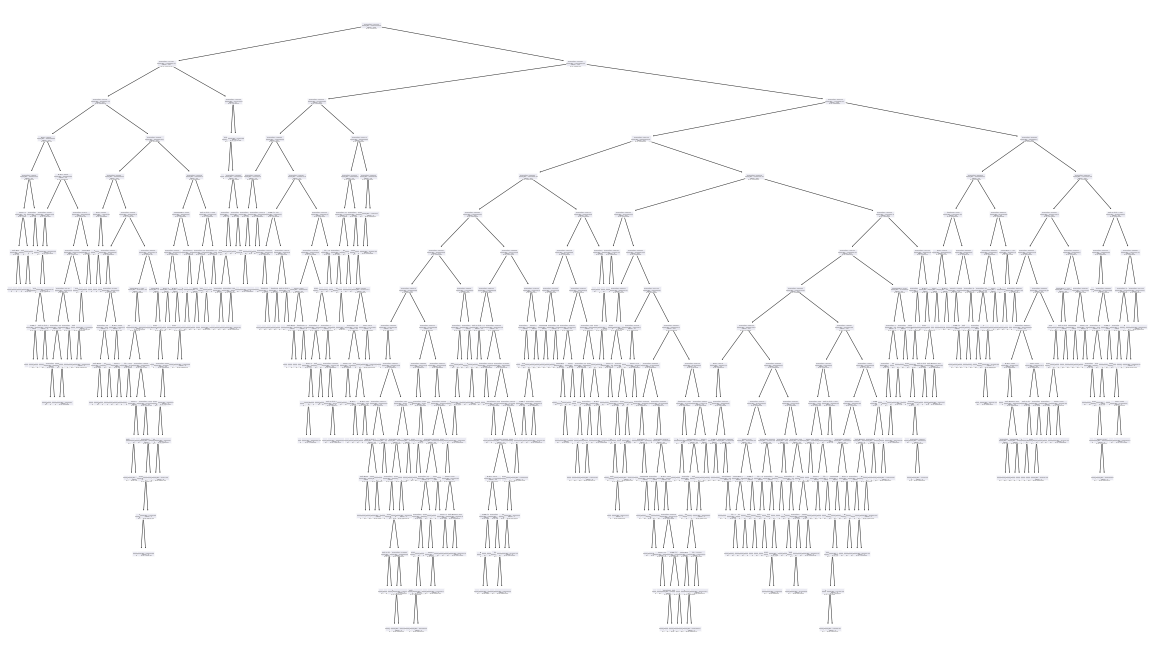

In [ ]:
tree.plot_tree(ext_models[0], feature_names = ext_models[0].feature_names_in_)
plt.show()

## ElasticNet (Evaluation)

In [ ]:
ecnet = ElasticNet(
    alpha = 3.776,
    l1_ratio = 0.5836,
    random_state = 0,
)

In [ ]:
ecnet_models = []
ecnet_test_preds = []
ecnet_scores = []
for i, (t, v) in enumerate(kf.split(train_df, y)) :
    xtrain = train_df.iloc[t, :]
    xval = train_df.iloc[v, :]
    xtest = test_df.copy()
    ytrain = y.iloc[t]
    yval = y.iloc[v]

    model = ecnet.fit(xtrain, ytrain)

    yhat = model.predict(xval)
    ypred = model.predict(xtest)
    score = mean_squared_error(yval, yhat, squared = False)

    ecnet_models.append(model)
    ecnet_test_preds.append(ypred)
    ecnet_scores.append(score)

    print(f'FOLD {i} RMSE  : {score}')
    gc.collect()
print('')
print(f'Mean Scores : {np.mean(ecnet_scores)}')

FOLD 0 RMSE  : 286540.33636808075
FOLD 1 RMSE  : 159114.3485361615
FOLD 2 RMSE  : 175718.2109505864
FOLD 3 RMSE  : 173950.75144977358
FOLD 4 RMSE  : 202610.98092050775

Mean Scores : 199586.925645022


In [ ]:
evaluation['ElasticNet'] = ecnet_scores
evaluation

,RF,Ridge,Lasso,ET,EXT,ElasticNet
0,284917.680506,286588.357874,286530.538398,288553.539476,368977.663109,286540.336368
1,155504.738080,159179.529937,159183.355276,163802.608634,196159.959412,159114.348536
2,178353.660935,175567.347095,175899.227145,183513.402648,185965.304794,175718.210951
3,174808.296615,173958.493781,173947.443569,180013.002742,189329.126224,173950.751450
4,140952.975698,202617.914471,202600.850304,138210.407033,147316.115530,202610.980921


In [ ]:
coef_ecnet = np.mean([model.coef_ for model in ecnet_models], axis = 0)
intercept_ecnet = np.mean([model.intercept_ for model in ecnet_models], axis = 0)

In [ ]:
formula = [f'{m:.4f}*({x})' for m, x in zip(coef_ecnet, ecnet_models[0].feature_names_in_)] + [f'{intercept_ecnet:.2f}']
formula

['99.7819*(squareMeters)',
 '96.5678*(numberOfRooms)',
 '-252.9040*(hasYard)',
 '361.7410*(hasPool)',
 '83.3050*(floors)',
 '679.4775*(cityPartRange)',
 '-303.4739*(numPrevOwners)',
 '46.5200*(made)',
 '61.5241*(isNewBuilt)',
 '-228.1734*(hasStormProtector)',
 '0.4514*(basement)',
 '-0.5290*(attic)',
 '-6.6554*(garage)',
 '901.7187*(hasStorageRoom)',
 '348.3162*(hasGuestRoom)',
 '-90266.95']

In [ ]:
formula_str = 'y = ' + ' + '.join(formula)
formula_str

'y = 99.7819*(squareMeters) + 96.5678*(numberOfRooms) + -252.9040*(hasYard) + 361.7410*(hasPool) + 83.3050*(floors) + 679.4775*(cityPartRange) + -303.4739*(numPrevOwners) + 46.5200*(made) + 61.5241*(isNewBuilt) + -228.1734*(hasStormProtector) + 0.4514*(basement) + -0.5290*(attic) + -6.6554*(garage) + 901.7187*(hasStorageRoom) + 348.3162*(hasGuestRoom) + -90266.95'

In [ ]:
with open("/content/drive/MyDrive/ML Project /Kaggle's Playground Series S3E6/Formula/ElasticNet.txt", 'w') as f :
    f.write(formula_str)